In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


Text(0, 0.5, 'Per capita income (US$)')

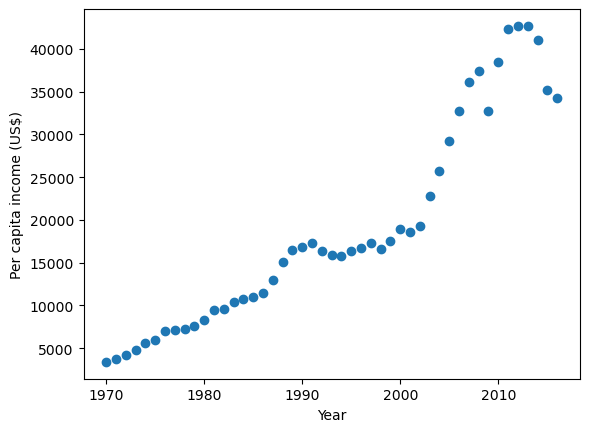

In [32]:
plt.scatter( df["year"],df["per capita income (US$)"])
plt.xlabel("Year")
plt.ylabel("Per capita income (US$)")

In [33]:
x = df.drop("per capita income (US$)", axis = "columns")
y = df.drop("year", axis = 'columns')

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=4)

In [10]:
x_train

,year
22,1992
37,2007
12,1982
42,2012
26,1996
25,1995
44,2014
13,1983
10,1980
19,1989


In [11]:
x_test

,year
32,2002
45,2015
4,1974
15,1985
38,2008
20,1990
16,1986
7,1977
18,1988
11,1981


In [12]:
y_train

,per capita income (US$)
22,16412.083090
37,36144.481220
12,9619.438377
42,42665.255970
26,16699.826680
25,16369.317250
44,41039.893600
13,10416.536590
10,8355.968120
19,16426.725480


In [13]:
y_test

,per capita income (US$)
32,19232.175560
45,35175.188980
4,5576.514583
15,11018.955850
38,37446.486090
20,16838.673200
16,11482.891530
7,7100.126170
18,15080.283450
11,9434.390652


In [14]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([[838.64937052]])

In [16]:
lr.intercept_

array([-1652489.46109324])

In [35]:
m=838.64937052
c=-1652489.46109324
z = m*40+c
z

-1618943.48627244

In [36]:
lr.predict([[40]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1618943.48627246]])

In [37]:
pred=lr.predict(x_test)
pred

array([[26486.57868664],
       [37389.02050339],
       [ 3004.39631209],
       [12229.5393878 ],
       [31518.47490975],
       [16422.7862404 ],
       [13068.18875832],
       [ 5520.34442365],
       [14745.48749936],
       [ 8874.94190573]])

In [38]:
pd.DataFrame(np.c_[x_test, y_test, pred], columns = ["year", "per capita income (US$)_original","per capita income (US$)_predicted"])

,year,per capita income (US$)_original,per capita income (US$)_predicted
0,2002.0,19232.175560,26486.578687
1,2015.0,35175.188980,37389.020503
2,1974.0,5576.514583,3004.396312
3,1985.0,11018.955850,12229.539388
4,2008.0,37446.486090,31518.474910
5,1990.0,16838.673200,16422.786240
6,1986.0,11482.891530,13068.188758
7,1977.0,7100.126170,5520.344424
8,1988.0,15080.283450,14745.487499
9,1981.0,9434.390652,8874.941906


In [39]:
lr.score(x_test,y_test)

0.904077759482906